In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [4]:
# 1. Load data
df = pd.read_csv('FinalDataset.csv')  # Replace with the actual path
X = df.drop(columns=['Price'])     # Features
y = df['Price']                    # Target

In [5]:
df

,Brand,SSD_Capacity,RAM,Graphics_Card,Operating_System,Graphics_Memory_Type,Graphics_Card_Type,Processor_Core_Count,Graphics_Card_Memory,Price
0,48,512.0,16.0,5,0,5,0,4.0,4.0,13716.90
1,10,512.0,16.0,42,4,2,0,4.0,4.0,13678.00
2,48,512.0,16.0,9,0,5,0,4.0,4.0,12857.74
3,10,256.0,32.0,9,4,5,0,6.0,8.0,20799.00
4,48,512.0,16.0,5,0,5,0,4.0,4.0,12834.62
...,...,...,...,...,...,...,...,...,...,...
2461,19,1024.0,64.0,24,4,2,0,24.0,4.0,42606.03
2462,19,2048.0,64.0,25,4,7,0,24.0,4.0,51946.97
2463,19,4096.0,12.0,11,4,9,1,24.0,2.0,43954.05
2464,19,2048.0,48.0,24,4,2,0,24.0,4.0,43963.48


In [6]:
X

,Brand,SSD_Capacity,RAM,Graphics_Card,Operating_System,Graphics_Memory_Type,Graphics_Card_Type,Processor_Core_Count,Graphics_Card_Memory
0,48,512.0,16.0,5,0,5,0,4.0,4.0
1,10,512.0,16.0,42,4,2,0,4.0,4.0
2,48,512.0,16.0,9,0,5,0,4.0,4.0
3,10,256.0,32.0,9,4,5,0,6.0,8.0
4,48,512.0,16.0,5,0,5,0,4.0,4.0
...,...,...,...,...,...,...,...,...,...
2461,19,1024.0,64.0,24,4,2,0,24.0,4.0
2462,19,2048.0,64.0,25,4,7,0,24.0,4.0
2463,19,4096.0,12.0,11,4,9,1,24.0,2.0
2464,19,2048.0,48.0,24,4,2,0,24.0,4.0


In [7]:
y

0       13716.90
1       13678.00
2       12857.74
3       20799.00
4       12834.62
          ...   
2461    42606.03
2462    51946.97
2463    43954.05
2464    43963.48
2465    45309.87
Name: Price, Length: 2466, dtype: float64

In [8]:
# 2. Split dataset
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 0.25 * 0.8 = 0.2

In [9]:
# 3. Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [10]:
# 4. Train and tune hyperparameter (degree)
best_degree = None
best_rmse = float('inf')
best_model = None

for degree in range(2, 6):  # Try degrees 2 to 5
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly = poly.transform(X_val_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred_val = model.predict(X_val_poly)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    print(f"Degree: {degree}, Validation RMSE: {rmse:.2f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_degree = degree
        best_model = model
        best_poly = poly


Degree: 2, Validation RMSE: 8510.38
Degree: 3, Validation RMSE: 70847.97
Degree: 4, Validation RMSE: 283767.17
Degree: 5, Validation RMSE: 447155.43


In [11]:
# 5. Evaluate on test data
X_test_poly = best_poly.transform(X_test_scaled)
y_pred_test = best_model.predict(X_test_poly)


In [12]:
# 6. Metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

n = X_test_poly.shape[0]
p = X_test_poly.shape[1] - 1
adjusted_r2 = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

print("\n🧪 Final Evaluation on Test Set:")
print(f"Best Degree: {best_degree}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"R² Score: {r2_test:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")



🧪 Final Evaluation on Test Set:
Best Degree: 2
Test RMSE: 15503.13
R² Score: 0.2763
Adjusted R² Score: 0.2344


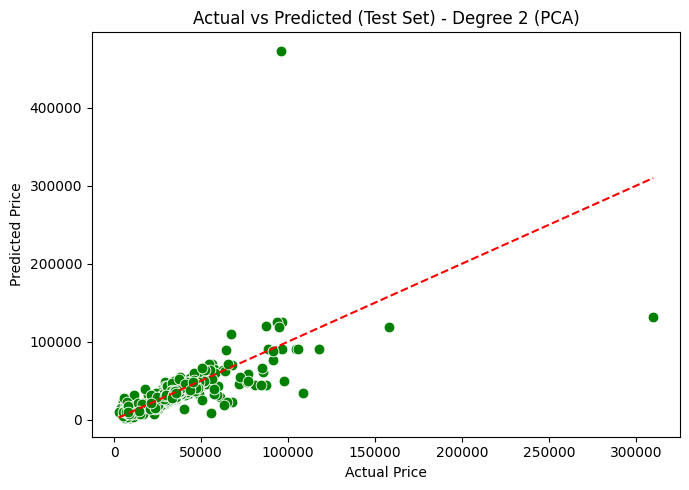

In [13]:
# 8. Actual vs Predicted (test set)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_test_pred, s=60, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted (Test Set) - Degree {best_degree} (PCA)")
plt.tight_layout()
plt.show()